## Ejemplo 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aprender cómo dividir nuestro dataset en dos para entrenar nuestro modelo y probarlo utilizando diferentes datos.
    - Aprender a entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

### a) Regresión Linear Múltiple

Vamos a combinar esta técnica con un modelo de Regresión Linear Múltiple. La Regresión Linear Múltiple es básicamente lo mismo que la Regresión Linear Simple, con la diferencia de que podemos utilizar más de una variable independiente y dependiente. Es más difícil (y a veces en realidad imposible) visualizar la función lineal que obtenemos a través de una Regresión Linear Múltiple, puesto que la línea que representa es una línea que se encuentra en ¡más de dos dimensiones! Pero el concepto es el mismo: utilizamos una o más variables independientes para entrenar un modelo, con el objetivo de encontrar una función lineal que pueda predecir a una o más variables dependientes.

Por suerte, el proceso de entrenamiento es en realidad el mismo, así que podemos concentrarnos en aprender a dividir nuestro dataset en entrenamiento y prueba.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [7]:
df = df.drop(columns=['outcome'])

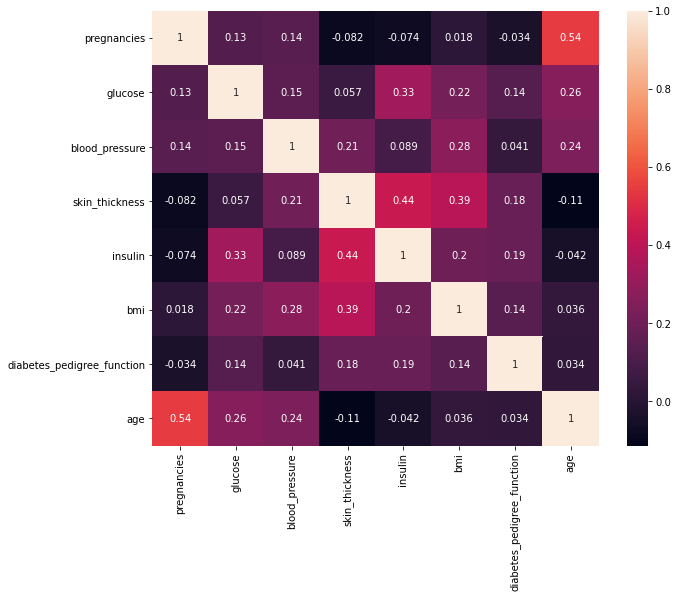

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

Ahora vamos a utilizar este método de `scikit learn` para dividir nuestro dataset en dos. Voy a entrenar un modelo para intentar predecir los niveles de insulina en una persona utilizando las variables 'glucose' y 'skin_thickness', así que mi variable dependiente será 'glucose' y mis variables independientes serán las otras dos.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['glucose', 'skin_thickness']]
y = df['insulin']

In [13]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Nota el tamaño del dataset de prueba (30% del total) y que estamos revolviendo el dataset aleatoriamente antes de realizar la división.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [30]:
lr.score(X_test, y_test)

0.3048481180331696

Como puedes ver, nuestro R2 es menor incluso que los coeficientes de correlación que tienen ambas variables independientes con la dependiente. Esto significa que nuestra precisión no es necesariamente 'acumulativa'.

Mira lo que sucede si entrenamos nuestro modelo sin hacer la división de entrenamiento y prueba:

In [19]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [25]:
lr_2.score(X, y)

0.28491868235030937

Obtenemos un score ligeramente mejor. Aunque en este caso no resulta tan relevante porque de todas maneras el poder predictivo es prácticamente nulo, nos demuestra que el modelo puede a veces aprender a predecir correctamente los datos que conoce y generalizar muy mal a datos que no conoce.